In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv("Healthcare Providers.csv")

In [3]:
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [4]:
df.columns

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

In [5]:
df.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [7]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [8]:
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [30]:
Drop= ['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider','Zip Code of the Provider',"HCPCS Description"]

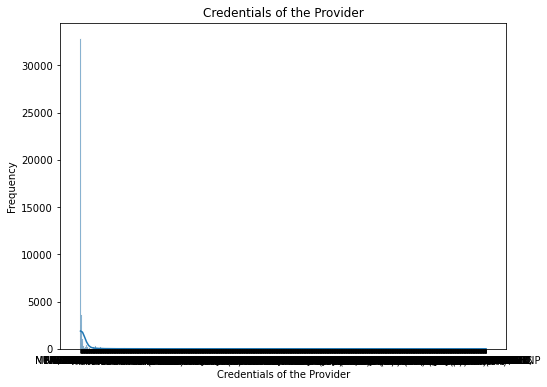

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Credentials of the Provider'], kde=True)
plt.title('Credentials of the Provider')
plt.xlabel('Credentials of the Provider')
plt.ylabel('Frequency')
plt.show()

In [13]:
df["Credentials of the Provider"].value_counts()

MD                    32874
M.D.                  32757
D.O.                   3533
DO                     2478
PA-C                   1859
                      ...  
DPT MFS                   1
PT, CERT. MDT, NCS        1
MD FAAFP FACEP            1
PT, DPT, MS               1
PT,DPTATC                 1
Name: Credentials of the Provider, Length: 1854, dtype: int64

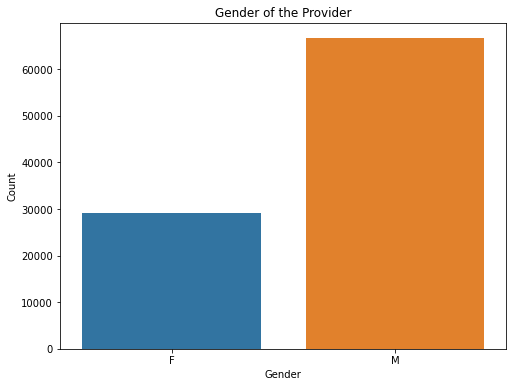

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender of the Provider', data=df)
plt.title('Gender of the Provider')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [18]:
df["Entity Type of the Provider"].value_counts()

I    95746
O     4254
Name: Entity Type of the Provider, dtype: int64

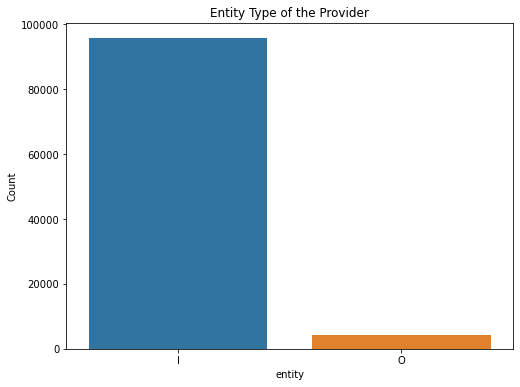

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Entity Type of the Provider', data=df)
plt.title('Entity Type of the Provider')
plt.xlabel('entity')
plt.ylabel('Count')
plt.show()

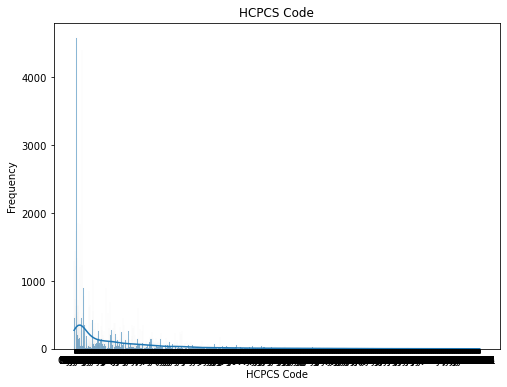

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['HCPCS Code'], kde=True)
plt.title('HCPCS Code')
plt.xlabel('HCPCS Code')
plt.ylabel('Frequency')
plt.show()

In [21]:
df["HCPCS Drug Indicator"].value_counts()

N    93802
Y     6198
Name: HCPCS Drug Indicator, dtype: int64

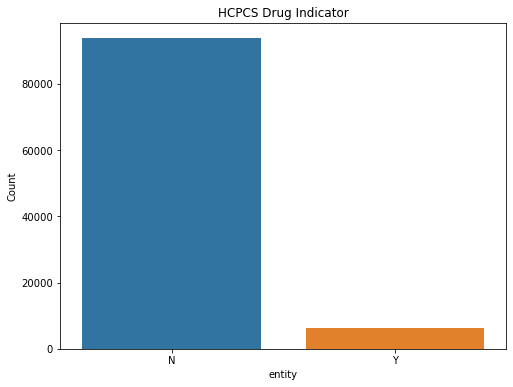

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HCPCS Drug Indicator', data=df)
plt.title('HCPCS Drug Indicator')
plt.xlabel('entity')
plt.ylabel('Count')
plt.show()

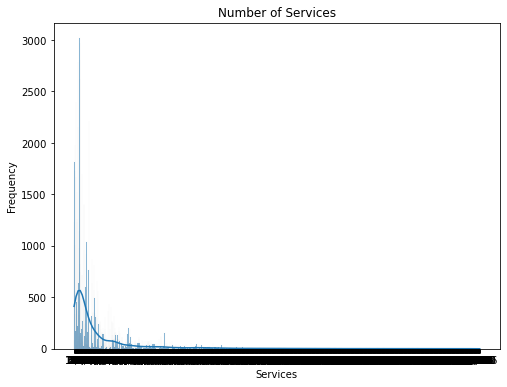

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Number of Services'], kde=True)
plt.title('Number of Services')
plt.xlabel('Services')
plt.ylabel('Frequency')
plt.show()

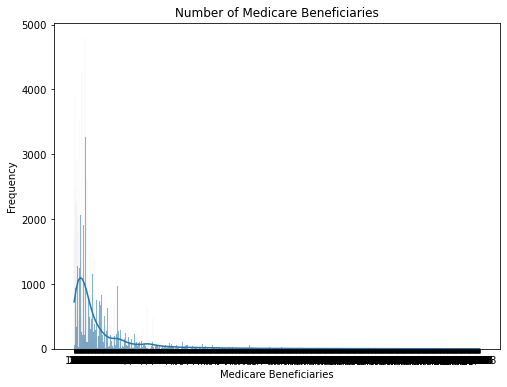

In [24]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Number of Medicare Beneficiaries'], kde=True)
plt.title('Number of Medicare Beneficiaries')
plt.xlabel('Medicare Beneficiaries')
plt.ylabel('Frequency')
plt.show()

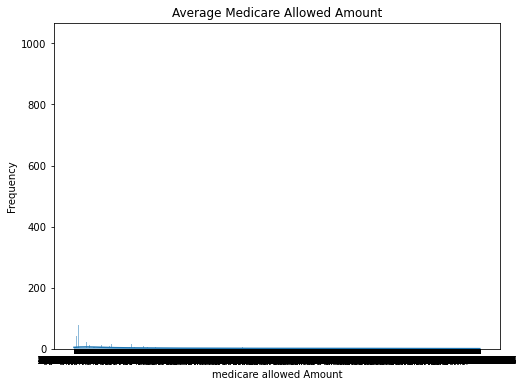

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Average Medicare Allowed Amount'], kde=True)
plt.title('Average Medicare Allowed Amount')
plt.xlabel('medicare allowed Amount')
plt.ylabel('Frequency')
plt.show()

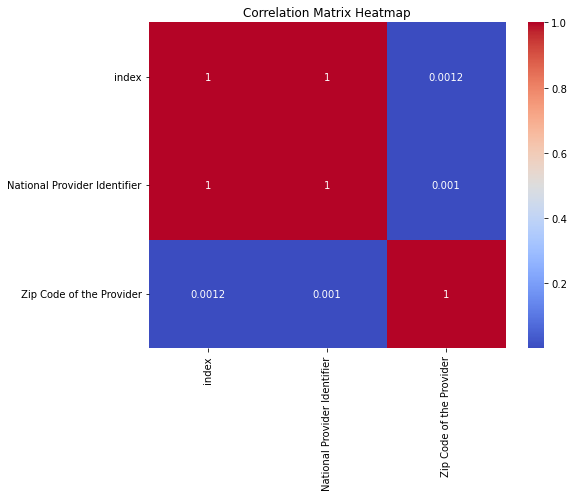

In [37]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()